# Aula 03 \ 
Nesta aula veremos:

Numpy arrays e pandas Dataframes \
Open and export files \
Conditional Statements \
Loops em Python \
Functions - def 

# 1.1 Numpy arrays

In [1]:
# lembrar de importar as bibliotecas
import numpy as np

# Criando um vetor de dados aleatórios
data = np.random.rand(1000,2)

# Verificando o tamanho do vetor
print(data.shape)
print(np.size(data))

# Print de uma amostra dos dados
print(data[0:10])
print(data[0:10].shape)

(1000, 2)
2000
[[0.67968435 0.01426276]
 [0.47569374 0.62679641]
 [0.60029065 0.5725128 ]
 [0.80520232 0.45874317]
 [0.3111746  0.4278234 ]
 [0.60257562 0.43167422]
 [0.66723887 0.24594516]
 [0.07902058 0.41396019]
 [0.46844412 0.47311042]
 [0.31595842 0.59306637]]
(10, 2)


In [2]:
# Usando Monte-Carlo
# Colocando um limite de data para pegar os intervalos
dataMax = 1000
dataMin = 10
data = (dataMax - dataMin)*data + dataMin
print(data[0:10])

[[682.88751142  24.12013289]
 [480.93680742 630.5284488 ]
 [604.28773964 576.7876717 ]
 [807.15029678 464.15574227]
 [318.06285193 433.54516503]
 [606.54986678 437.3574734 ]
 [670.56648589 253.48570358]
 [ 88.23037325 419.82058797]
 [473.75968331 478.37931939]
 [322.79883381 597.13570139]]


<class 'numpy.ndarray'>


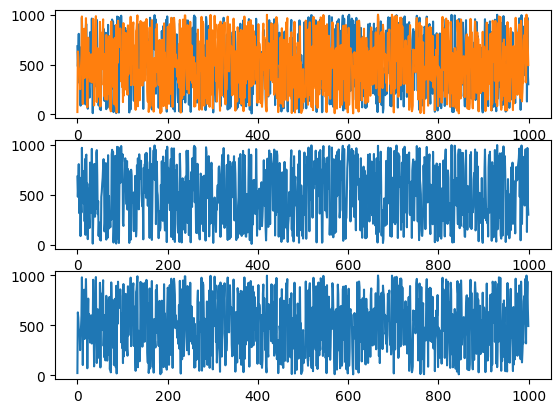

In [3]:
# bibliotecas que são baixadas para ser possível o uso nos códigos 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3)
ax[0].plot(data)
ax[1].plot(data[:,0])
ax[2].plot(data[:,1])
print(type(data))

In [4]:
# Criando um dado 2D 
data3d = np.sin(np.random.rand(1000,1000))
print(data3d)

[[0.62419524 0.63137475 0.17343087 ... 0.2415794  0.52715107 0.57168751]
 [0.69425445 0.06513784 0.31097331 ... 0.83582081 0.11750234 0.76530691]
 [0.80114358 0.02665529 0.49799531 ... 0.5240336  0.17622828 0.50702961]
 ...
 [0.32544927 0.32489029 0.13855962 ... 0.44274887 0.1776225  0.59459625]
 [0.0260134  0.5120799  0.08206054 ... 0.49928829 0.07024737 0.44363802]
 [0.44093413 0.80518317 0.32932441 ... 0.50757508 0.48651299 0.47592647]]


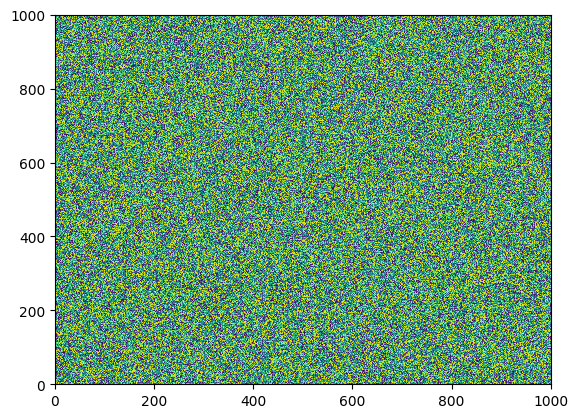

In [5]:
# Plotando um dado 3D
fig2, ax2 = plt.subplots()
ax2.pcolor(data3d)

In [6]:
# Criando vertor temporal
dtime = np.arange(np.datetime64("2022-01-01"), np.datetime64("2023-01-01"), np.timedelta64(1, "h"))
print(dtime[1:10])
print(dtime.shape)
print(type(dtime))

['2022-01-01T01' '2022-01-01T02' '2022-01-01T03' '2022-01-01T04'
 '2022-01-01T05' '2022-01-01T06' '2022-01-01T07' '2022-01-01T08'
 '2022-01-01T09']
(8760,)
<class 'numpy.ndarray'>


# Pandas

In [7]:
import pandas as pd

# Criando um dataframe
df = pd.DataFrame()

In [8]:
# Monstrando um dataframe
df['datetime'] = dtime

In [9]:
# Criando uma coluna random dentro do dataframe df
df['random'] = np.random.rand(df.shape[0])

In [10]:
df['random'][1:10]

1    0.685780
2    0.121660
3    0.042482
4    0.226423
5    0.396734
6    0.322951
7    0.240327
8    0.217908
9    0.370711
Name: random, dtype: float64

In [11]:
# Indexação
df.iloc[:,0]

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
8755   2022-12-31 19:00:00
8756   2022-12-31 20:00:00
8757   2022-12-31 21:00:00
8758   2022-12-31 22:00:00
8759   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[s]

In [12]:
# Colocando o datetime como index
df = df.set_index(df['datetime'])
df

,datetime,random
datetime,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.322607
2022-01-01 01:00:00,2022-01-01 01:00:00,0.685780
2022-01-01 02:00:00,2022-01-01 02:00:00,0.121660
2022-01-01 03:00:00,2022-01-01 03:00:00,0.042482
2022-01-01 04:00:00,2022-01-01 04:00:00,0.226423
...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.024732
2022-12-31 20:00:00,2022-12-31 20:00:00,0.139991
2022-12-31 21:00:00,2022-12-31 21:00:00,0.604806


In [13]:
# Criando colunas com ano, mês e dia
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

(8760,)


<Axes: xlabel='datetime'>

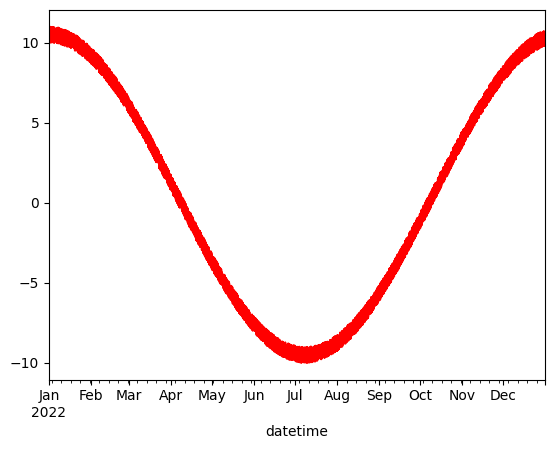

In [14]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*4)))
df['timeSeries'] = 10*df['sazonal']+df['random']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [15]:
df

,datetime,random,year,month,day,sazonal,timeSeries
datetime,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.322607,2022,1,1,1.000000,10.322607
2022-01-01 01:00:00,2022-01-01 01:00:00,0.685780,2022,1,1,1.000000,10.685777
2022-01-01 02:00:00,2022-01-01 02:00:00,0.121660,2022,1,1,0.999999,10.121650
2022-01-01 03:00:00,2022-01-01 03:00:00,0.042482,2022,1,1,0.999998,10.042460
2022-01-01 04:00:00,2022-01-01 04:00:00,0.226423,2022,1,1,0.999996,10.226385
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.024732,2022,12,31,0.979401,9.818739
2022-12-31 20:00:00,2022-12-31 20:00:00,0.139991,2022,12,31,0.979541,9.935399
2022-12-31 21:00:00,2022-12-31 21:00:00,0.604806,2022,12,31,0.979680,10.401608


In [16]:
# Salvar meu dataframe
#inverter a barra nos diretorios

df.to_csv(r'C:\Users\Win10\Documents\Python.atm\ENS410064-polui-o-atm-\venv\dados\brutos\noisa_2022.csv')

OSError: Cannot save file into a non-existent directory: 'C:\Users\Win10\Documents\Python.atm\ENS410064-polui-o-atm-\venv\dados\brutos'

In [ ]:
# Criando uma função
def noiseCreation(path, year):
    """Esta função cria um ruido com sazonalidade.
    Inputs:
        path = asdasdas
        year = asdasdasdas

    Criado por Leonardo
    """
    
    # Criando um dataframe
    df = pd.DataFrame()
    
    # Criando vertor temporal
    dtime = np.arange(np.datetime64(str(year)+"-01-01"), np.datetime64(str(year+1)+"-01-01"), np.timedelta64(1, "h"))
    
    # Monstrando um dataframe
    df['datetime'] = dtime
        
    # Datetime como index do dataframe
    df = df.set_index(df['datetime'])
    
    # Criando colunas com ano, mês e dia
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    
    # Crio uma coluna random
    df['random'] = np.random.rand(df.shape[0])
    
    # Adicionar sazonalidade
    tt = np.arange(0,df.shape[0],1)
    print(tt.shape)
    df['sazonal'] = (np.cos(tt/(360*4)))
    df['timeSeries'] = 10*df['sazonal']+df['random']
    #df['sazonal'].plot()
    df['timeSeries'].plot(color='red')
    df.to_csv(path+'/noise_'+str(year)+'.csv')
    
    return df

(8760,)


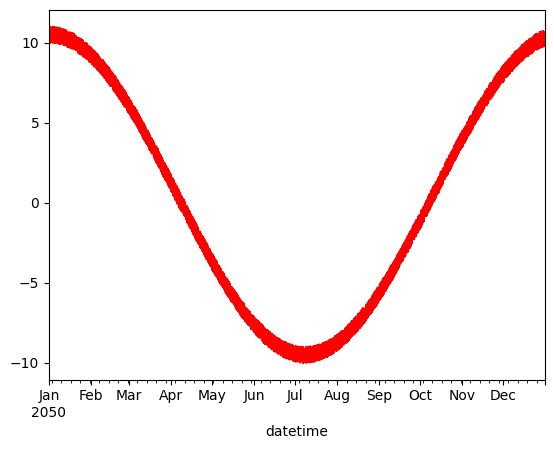

In [ ]:
path = 'C:/Users/Win10/Documents/Python.atm/ENS410064-polui-o-atm-/venv/dados/brutos'
df2 = noiseCreation(path,2050)

2002
(8760,)
2003
(8760,)
2004
(8784,)
2005
(8760,)
2006
(8760,)
2007
(8760,)
2008
(8784,)
2009
(8760,)


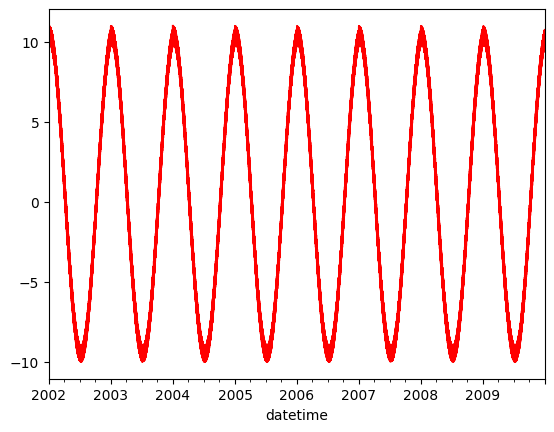

In [ ]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [ ]:
df

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2009-01-01 00:00:00,2009-01-01 00:00:00,2009,1,1,0.613550,1.000000,10.613550
2009-01-01 01:00:00,2009-01-01 01:00:00,2009,1,1,0.952918,1.000000,10.952916
2009-01-01 02:00:00,2009-01-01 02:00:00,2009,1,1,0.790690,0.999999,10.790681
2009-01-01 03:00:00,2009-01-01 03:00:00,2009,1,1,0.646421,0.999998,10.646400
2009-01-01 04:00:00,2009-01-01 04:00:00,2009,1,1,0.604934,0.999996,10.604895
...,...,...,...,...,...,...,...
2009-12-31 19:00:00,2009-12-31 19:00:00,2009,12,31,0.382659,0.979401,10.176667
2009-12-31 20:00:00,2009-12-31 20:00:00,2009,12,31,0.502410,0.979541,10.297817
2009-12-31 21:00:00,2009-12-31 21:00:00,2009,12,31,0.347420,0.979680,10.144222


2001
2030
2032
(8784,)
2053
(8760,)
2060
(8784,)


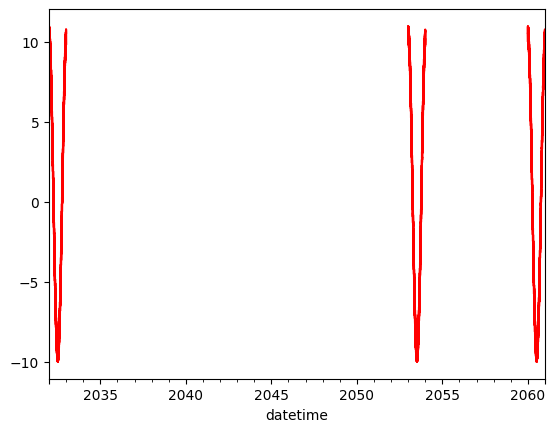

In [ ]:
anos = [2001,2030,2032,2053,2060]

for ano in anos:
    print(ano)
    if ano > 2030:
        df = noiseCreation(path,ano)

In [ ]:
import os
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file)
        allData.append(data)

['noisa_2022.csv', 'noise_2002.csv', 'noise_2003.csv', 'noise_2004.csv', 'noise_2005.csv', 'noise_2006.csv', 'noise_2007.csv', 'noise_2008.csv', 'noise_2009.csv', 'noise_2024.csv', 'noise_2032.csv', 'noise_2050.csv', 'noise_2053.csv', 'noise_2060.csv']
noisa_2022.csv
noise_2002.csv
noise_2003.csv
noise_2004.csv
noise_2005.csv
noise_2006.csv
noise_2007.csv
noise_2008.csv
noise_2009.csv
noise_2024.csv


PermissionError: [Errno 13] Permission denied: 'C:/Users/Win10/Documents/Python.atm/ENS410064-polui-o-atm-/venv/dados/brutos/noise_2024.csv'

In [ ]:
allDataDf = pd.concat(allData)

In [ ]:
allDataDf

,datetime,datetime.1,random,year,month,day,sazonal,timeSeries
0,2022-01-01 00:00:00,2022-01-01 00:00:00,0.124228,2022,1,1,1.000000,10.124228
1,2022-01-01 01:00:00,2022-01-01 01:00:00,0.435749,2022,1,1,1.000000,10.435746
2,2022-01-01 02:00:00,2022-01-01 02:00:00,0.420432,2022,1,1,0.999999,10.420422
3,2022-01-01 03:00:00,2022-01-01 03:00:00,0.550371,2022,1,1,0.999998,10.550349
4,2022-01-01 04:00:00,2022-01-01 04:00:00,0.695821,2022,1,1,0.999996,10.695783
...,...,...,...,...,...,...,...,...
8755,2009-12-31 19:00:00,2009-12-31 19:00:00,0.382659,2009,12,31,0.979401,10.176667
8756,2009-12-31 20:00:00,2009-12-31 20:00:00,0.502410,2009,12,31,0.979541,10.297817
8757,2009-12-31 21:00:00,2009-12-31 21:00:00,0.347420,2009,12,31,0.979680,10.144222
8758,2009-12-31 22:00:00,2009-12-31 22:00:00,0.732169,2009,12,31,0.979819,10.530362
